# Task 3.1
Development of a classification model for discriminating between 2 classes: masses and calcification. Usage of at least one pre-trained state-of-the-art architecture.

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
import os
from google.colab import drive
import numpy as np

TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
drive.mount('/content/drive')
os.listdir()


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


['.config', 'drive', 'sample_data']

In [0]:
base_dir = 'drive/My Drive/Computational Intelligence - MY PROJECT/My_Project_CompInt' 
os.listdir(base_dir)

['Task3.1_VGG16.ipynb',
 'OldNotebooks',
 'Task 1',
 'Models',
 'Task4_RelevantPapers',
 'Task5.ipynb',
 'Task 3.1_ INCEPTIONV3.ipynb',
 'Tensors',
 'Task3.2_INCEPTION.ipynb',
 'Task2.2.ipynb',
 'Task2.1_With Data Aug.ipynb',
 'Task3.2_VGG16.ipynb',
 'Task4.ipynb']

In [0]:
#Restore the saved model
model = tf.keras.models.load_model(os.path.join(base_dir,'Models/Model_Task2.1_BaseVersion.h5'))

# Show the model architecture
model.summary()

# Getting the Data 

In [0]:
from tensorflow.keras.utils import to_categorical
def load_training():
  train_images = np.load(os.path.join(base_dir,'Tensors/train_tensor.npy'))
  train_labels = np.load(os.path.join(base_dir,'Tensors/train_labels.npy'))
  test_images = np.load(os.path.join(base_dir,'Tensors/public_test_tensor.npy'))
  test_lables = np.load(os.path.join(base_dir,'Tensors/public_test_labels.npy'))
  return train_images,train_labels, test_images, test_lables
 
train_images, train_labels, test_images, test_lable = load_training()




## Reshape

In [0]:
# reshape per poter fittare la CNN
# the input shape has to be (224, 224, 3)
train_images = train_images.reshape((5352, 150, 150,1))
train_images = train_images.astype('float32') / 65535

#adding channels
#b = tf.zeros([5352,150, 150, 1])
b = train_images
c = tf.concat([train_images, b], axis=3)
RGB_train_images_toResize = tf.concat([c, b], axis=3)
RGB_train_images = tf.image.resize(RGB_train_images_toResize, ( 224, 224))
print(RGB_train_images.shape)



test_images = test_images.reshape((672, 150, 150,1))
test_images = test_images.astype('float32') / 65535

#adding channels
#b = tf.zeros([672,150, 150, 1])
b = test_images
c = tf.concat([test_images, b], axis=3)
RGB_test_images_toResize = tf.concat([c, b], axis=3)
RGB_test_images = tf.image.resize(RGB_test_images_toResize, ( 224, 224))
print(RGB_test_images[0])




In [0]:
print(train_labels[0:100])

In [0]:
#Some check on size

#print("train_image[0]", train_images[3])


print("train_images shape:",RGB_train_images.shape)#just for check
print("train_images dim:",RGB_train_images.ndim)
print("train_images[0] shape:",RGB_train_images[0].shape)#just for check
print("train_images[0] dim:",RGB_train_images[0].ndim)
print("train_images dtype:",RGB_train_images.dtype)

print("lables:")



print("train_labels shape:",train_labels.shape)#just for check
print("train_labels dim:",train_labels.ndim)
print("train_labels[0] shape:",train_labels[0].shape)#just for check
print("train_labels[0] dim:",train_labels[0].ndim)
print("train_labels dtype:",train_labels.dtype)
print("train_labels[0]", train_labels[1])



##DATASet manipulation
In order to perform binary classification some manipulations must be done 

In [0]:
print(RGB_train_images[0:2])

## Deleting the baseline

In [0]:
#Here i manage the input tensors, removing the baseline patch and the relative labels in order to perform binary classification
SubTrainArray =  np.empty_like(RGB_train_images)
SubTrainArray =  np.delete(RGB_train_images, np.s_[::2], 0)

SubLabelArray = np.empty_like(train_labels)
SubLabelArray =  np.delete(train_labels, np.s_[::2], 0)


In [0]:
print(SubLabelArray[0:1000])
print(SubLabelArray[1000:2000])
print(SubTrainArray.shape)


## Editing the label 

In [0]:
#Here i manage the input tensor and the label in order to perform binary classification

leng = len(SubLabelArray)
SubLabelArray_Binary = np.empty_like(SubLabelArray)
for i in range(leng):
    if SubLabelArray[i] == 1 or SubLabelArray[i] == 2 :
      SubLabelArray_Binary[i] = 0
    if SubLabelArray[i] == 3 or SubLabelArray[i] == 4:
      SubLabelArray_Binary[i] = 1

print(SubLabelArray_Binary[0:1000])
print(SubLabelArray_Binary[2000:])


## Shuffle

In [0]:
#eseguo uno shuffle dei dati 
 from sklearn.utils import shuffle

 SubTrainArray_Shuffled, SubLabelArray_Shuffled = shuffle( SubTrainArray, SubLabelArray_Binary, random_state=1000)



In [0]:
#Printing in order to check if the shuffled has been performed well
print(SubLabelArray_Shuffled[0:1000])
print(SubLabelArray_Shuffled[2000:3000])


## Modifiyng the test set

### Deleting BaseLine

In [0]:
#Here i manage the TEST data set, removing baseline
SubTestArray =  np.empty_like(RGB_test_images)
SubTestArray =  np.delete(RGB_test_images, np.s_[::2], 0)

SubTestLabelArray = np.empty_like(test_lable)
SubTestLabelArray =  np.delete(test_lable, np.s_[::2], 0)
print(SubTestLabelArray[0:1000])
print(SubTestArray.shape)

### Editing the labels 

In [0]:
#Here i modify the label
SubTestLabelArray_Edited = np.zeros_like(SubTestLabelArray)

leng = len(SubTestLabelArray)
for i in range(leng):
    if SubTestLabelArray[i] == 1 or SubTestLabelArray[i] == 2 :
      SubTestLabelArray_Edited[i] = 0
    if SubTestLabelArray[i] == 3 or SubTestLabelArray[i] == 4:
      SubTestLabelArray_Edited[i] = 1

print(SubTestLabelArray_Edited[0:1000])


# VGG 16
Not sure if this make sense since VGG 16 works with 3 channels

## Importing VGG


In [0]:
from tensorflow.keras.applications import VGG16

conv_VGG = VGG16(weights='imagenet',
                  include_top=False, #We do not need the classifier of IMAGENET competition
                  input_shape=(224, 224, 3))# Potrei usare anche 150x150 ma la rete è stata pensata per immagini a 224x224
conv_VGG.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

## Freezing the VGG layers


In [0]:
conv_VGG.trainable = False

## Adding my NET: Dropout VERSION



#### Define the model

In [0]:
keras.layers.Conv2D?
keras.layers.MaxPooling2D?
from tensorflow.keras import layers
from tensorflow.keras import models

model_DropOut = models.Sequential()

model_DropOut.add(conv_VGG)
model_DropOut.add(layers.Flatten())
model_DropOut.add(layers.Dense(512, activation='relu'))
model_DropOut.add(layers.Dropout(0.4))
model_DropOut.add(layers.Dense(256, activation='relu'))
model_DropOut.add(layers.Dropout(0.4))
model_DropOut.add(layers.Dense(128, activation='relu'))
model_DropOut.add(layers.Dense(1, activation='sigmoid'))



In [0]:
model_DropOut.summary()#a summary of the architecture

### Freezing and compile

Decido quali layer rendere trainabili

In [0]:
conv_VGG.trainable = True

set_trainable = False
for layer in conv_VGG.layers:
    if layer.name == 'block3_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Guardo quanti layer sono trainabili


In [0]:
print('This is the number of trainable weights ', len(model_DropOut.trainable_weights))

This is the number of trainable weights  8


In [0]:
model_DropOut.compile(optimizer='Adam',   #keras.optimizers.Adam(learning_rate=0.000001),
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])
#early stopping



In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=10)

### CrossValidation

processing fold # 0
Train on 2409 samples, validate on 267 samples
Epoch 1/40
2409/2409 [==============================] - 8s 3ms/sample - loss: 0.8507 - binary_accuracy: 0.5313 - val_loss: 0.6640 - val_binary_accuracy: 0.6105
Epoch 2/40
2409/2409 [==============================] - 7s 3ms/sample - loss: 0.6672 - binary_accuracy: 0.5782 - val_loss: 0.6046 - val_binary_accuracy: 0.6854
Epoch 3/40
2409/2409 [==============================] - 7s 3ms/sample - loss: 0.6332 - binary_accuracy: 0.6264 - val_loss: 0.5301 - val_binary_accuracy: 0.8052
Epoch 4/40
2409/2409 [==============================] - 7s 3ms/sample - loss: 0.6079 - binary_accuracy: 0.6409 - val_loss: 0.5350 - val_binary_accuracy: 0.7191
Epoch 5/40
2409/2409 [==============================] - 7s 3ms/sample - loss: 0.5452 - binary_accuracy: 0.6945 - val_loss: 0.5465 - val_binary_accuracy: 0.8015
Epoch 6/40
2409/2409 [==============================] - 7s 3ms/sample - loss: 0.5634 - binary_accuracy: 0.7057 - val_loss: 0.5772 - v

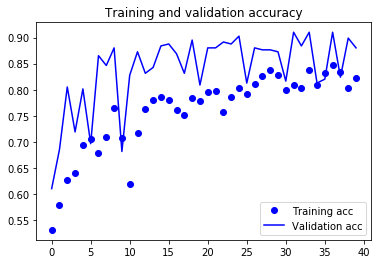

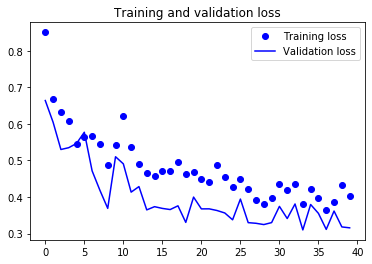

processing fold # 1
Train on 2409 samples, validate on 267 samples
Epoch 1/40
2409/2409 [==============================] - 8s 3ms/sample - loss: 0.9206 - binary_accuracy: 0.5185 - val_loss: 0.7143 - val_binary_accuracy: 0.4981
Epoch 2/40
2409/2409 [==============================] - 7s 3ms/sample - loss: 0.6675 - binary_accuracy: 0.5816 - val_loss: 0.6084 - val_binary_accuracy: 0.7079
Epoch 3/40
2409/2409 [==============================] - 7s 3ms/sample - loss: 0.6152 - binary_accuracy: 0.6272 - val_loss: 0.5289 - val_binary_accuracy: 0.8090
Epoch 4/40
2409/2409 [==============================] - 7s 3ms/sample - loss: 0.5914 - binary_accuracy: 0.6621 - val_loss: 0.4912 - val_binary_accuracy: 0.8277
Epoch 5/40
2409/2409 [==============================] - 7s 3ms/sample - loss: 0.5474 - binary_accuracy: 0.6920 - val_loss: 0.4052 - val_binary_accuracy: 0.8539
Epoch 6/40
2409/2409 [==============================] - 7s 3ms/sample - loss: 0.5618 - binary_accuracy: 0.6496 - val_loss: 0.5532 - v

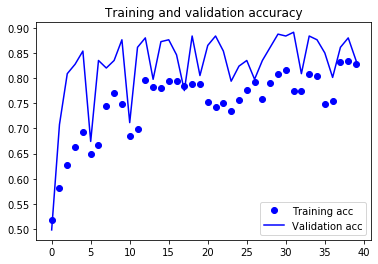

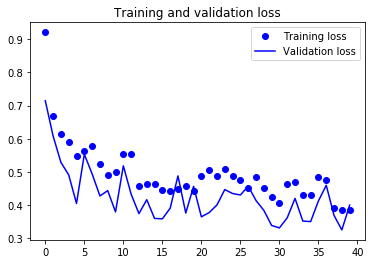

processing fold # 2
Train on 2409 samples, validate on 267 samples
Epoch 1/40
2409/2409 [==============================] - 8s 3ms/sample - loss: 0.8755 - binary_accuracy: 0.5127 - val_loss: 0.6652 - val_binary_accuracy: 0.5393
Epoch 2/40
2409/2409 [==============================] - 7s 3ms/sample - loss: 0.6758 - binary_accuracy: 0.5774 - val_loss: 0.6060 - val_binary_accuracy: 0.5393
Epoch 3/40
2409/2409 [==============================] - 7s 3ms/sample - loss: 0.6442 - binary_accuracy: 0.5990 - val_loss: 0.5773 - val_binary_accuracy: 0.5431
Epoch 4/40
2409/2409 [==============================] - 7s 3ms/sample - loss: 0.6064 - binary_accuracy: 0.6555 - val_loss: 0.5114 - val_binary_accuracy: 0.8577
Epoch 5/40
2409/2409 [==============================] - 7s 3ms/sample - loss: 0.5923 - binary_accuracy: 0.6692 - val_loss: 0.5054 - val_binary_accuracy: 0.8689
Epoch 6/40
2409/2409 [==============================] - 7s 3ms/sample - loss: 0.5585 - binary_accuracy: 0.7090 - val_loss: 0.4258 - v

KeyboardInterrupt: ignored

In [0]:
#cross-validation, SUL TRAINING ESTRATTO e shuffled
import numpy as np
keras.layers.Conv2D?
keras.layers.MaxPooling2D?
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt

def get_model():
  Cross_model_DropOut = models.Sequential()


  Cross_model_DropOut.add(conv_VGG)
  Cross_model_DropOut.add(layers.Flatten())
  Cross_model_DropOut.add(layers.Dense(512, activation='relu'))
  Cross_model_DropOut.add(layers.Dropout(0.4))
  Cross_model_DropOut.add(layers.Dense(258, activation='relu'))
  Cross_model_DropOut.add(layers.Dropout(0.4))
  Cross_model_DropOut.add(layers.Dense(128, activation='relu'))
  Cross_model_DropOut.add(layers.Dense(1, activation='sigmoid'))
  return Cross_model_DropOut

def plot():
  acc = history.history['binary_accuracy']
  val_acc = history.history['val_binary_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()
  return

k = 10
num_val_samples = len(SubTrainArray_Shuffled) // k
num_epochs = 40
Cross_model_DropOut = get_model()
Cross_model_DropOut.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['binary_accuracy'])
  
for i in range(k):
  print('processing fold #', i)
  val_data = SubTrainArray_Shuffled[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = SubLabelArray_Shuffled[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([SubTrainArray_Shuffled[:i * num_val_samples],SubTrainArray_Shuffled[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([SubLabelArray_Shuffled[:i * num_val_samples],SubLabelArray_Shuffled[(i + 1) * num_val_samples:]],axis=0)
  history = Cross_model_DropOut.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=32)
  Cross_model_DropOut = get_model()
  Cross_model_DropOut.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['binary_accuracy'])
  plot()



### FITTING COMPLETO 
Dopo la cross validation, fitto su tutto il DATASET

In [0]:
 history = model_DropOut.fit(SubTrainArray_Shuffled, SubLabelArray_Shuffled, epochs=50,callbacks=[callback], batch_size=32)


In [0]:
#Sblocco 
set_trainable = False
for layer in model_DropOut.layers:
    if layer.name == 'vgg16':
        set_trainable = False
    if set_trainable:
        layer.trainable = False
  

### Evalutate the model

In [0]:
#evaluate the model


test_loss, test_acc = model_DropOut.evaluate(SubTestArray, SubTestLabelArray_Edited, verbose= 1)
print(test_loss)
print(test_acc)

336/336 [==============================] - 1s 2ms/sample - loss: 0.3744 - binary_accuracy: 0.8631
0.3744267651012966
0.8630952


### Plotting

In [0]:
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

KeyError: ignored

### Load OR Save the model

In [0]:
#Save the model!
model_DropOut.save(os.path.join(base_dir,'Models/Model_Task_3.1_VGG16_justFitting_224x224_0.8631.h5'))

In [0]:
#Restore the saved model
model_DropOut = tf.keras.models.load_model(os.path.join(base_dir,'Models/Model_Task_2.1_WithDROPOUT_Definitivo_0.8.h5'))

# Show the model architecture
model_DropOut.summary()

## Building The Network: Adding Data Aumentation

#### Define the model

In [0]:
keras.layers.Conv2D?
keras.layers.MaxPooling2D?
from tensorflow.keras import layers
from tensorflow.keras import models

model_DropOut_Augmented = models.Sequential()

model_DropOut_Augmented.add(conv_VGG)
model_DropOut_Augmented.add(layers.Flatten())
model_DropOut_Augmented.add(layers.Dense(1024, activation='relu'))
model_DropOut_Augmented.add(layers.Dropout(0.4))
model_DropOut_Augmented.add(layers.Dense(512, activation='relu'))
model_DropOut_Augmented.add(layers.Dropout(0.4))
model_DropOut_Augmented.add(layers.Dense(256, activation='relu'))
model_DropOut_Augmented.add(layers.Dropout(0.4))
model_DropOut_Augmented.add(layers.Dense(128, activation='relu'))
model_DropOut_Augmented.add(layers.Dense(1, activation='sigmoid'))



In [0]:
conv_VGG.trainable = True

set_trainable = False
for layer in conv_VGG.layers:
    if layer.name == 'block3_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
conv_VGG.trainable = False

In [0]:
print('This is the number of trainable weights ', len(model_DropOut_Augmented.trainable_weights))

This is the number of trainable weights  10


In [0]:
model_DropOut_Augmented.compile(optimizer='Adam',   #keras.optimizers.Adam(learning_rate=0.000001),
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])
#early stopping



In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='binary_accuracy', patience=5)

## Getting the data

In [0]:
from tensorflow.keras.utils import to_categorical
def load_training():
  train_images = np.load(os.path.join(base_dir,'Tensors/train_tensor.npy'))
  train_labels = np.load(os.path.join(base_dir,'Tensors/train_labels.npy'))
  test_images = np.load(os.path.join(base_dir,'Tensors/public_test_tensor.npy'))
  test_lables = np.load(os.path.join(base_dir,'Tensors/public_test_labels.npy'))
  return train_images,train_labels, test_images, test_lables
 
train_images_Augmented, train_labels_Augmented, test_images_Augmented, test_lable_Augmented = load_training()





In [0]:
#reshape per poter fittare la CNN


train_images_Augmented = train_images_Augmented.reshape((5352, 150, 150,1))

#adding channels in TRAINING
b = train_images_Augmented
c = tf.concat([train_images_Augmented, b], axis=3)
RGB_train_images_Augmented_toResize = tf.concat([c, b], axis=3)
RGB_train_images_Augmented = tf.image.resize(RGB_train_images_Augmented_toResize, ( 224, 224))
print(RGB_train_images_Augmented[0])



test_images_Augmented = test_images_Augmented.reshape((672, 150, 150,1))

#adding channels in TESTSET
b = test_images_Augmented
c = tf.concat([test_images_Augmented, b], axis=3)
RGB_test_images_Augmented_toResize = tf.concat([c, b], axis=3)
RGB_test_images_Augmented = tf.image.resize(RGB_test_images_Augmented_toResize, ( 224, 224))
print(RGB_test_images_Augmented[0])

tf.Tensor(
[[[40798.    40798.    40798.   ]
  [41420.004 41420.004 41420.004]
  [41843.137 41843.137 41843.137]
  ...
  [43107.402 43107.402 43107.402]
  [42883.31  42883.31  42883.31 ]
  [42339.    42339.    42339.   ]]

 [[40231.49  40231.49  40231.49 ]
  [40724.47  40724.47  40724.47 ]
  [41065.39  41065.39  41065.39 ]
  ...
  [42034.83  42034.83  42034.83 ]
  [42259.875 42259.875 42259.875]
  [42505.473 42505.473 42505.473]]

 [[39586.727 39586.727 39586.727]
  [39798.387 39798.387 39798.387]
  [39955.39  39955.39  39955.39 ]
  ...
  [41166.875 41166.875 41166.875]
  [41750.93  41750.93  41750.93 ]
  [42561.75  42561.75  42561.75 ]]

 ...

 [[41119.82  41119.82  41119.82 ]
  [41247.746 41247.746 41247.746]
  [41525.535 41525.535 41525.535]
  ...
  [43925.67  43925.67  43925.67 ]
  [44051.938 44051.938 44051.938]
  [44128.68  44128.68  44128.68 ]]

 [[41540.613 41540.613 41540.613]
  [41574.305 41574.305 41574.305]
  [41698.574 41698.574 41698.574]
  ...
  [43739.2   43739.2   4373

### Deleting the baseline

In [0]:
#Here i manage the input tensors, removing the baseline patch and the relative labels in order to perform binary classification
SubTrainArray_AG =  np.empty_like(RGB_train_images_Augmented)
SubTrainArray_AG  =  np.delete(RGB_train_images_Augmented, np.s_[::2], 0)
print(SubTrainArray_AG[1])
SubLabelArray_AG  = np.empty_like(train_labels_Augmented)
SubLabelArray_AG  =  np.delete(train_labels_Augmented, np.s_[::2], 0)
print(SubLabelArray_AG[0:100])


### Editing the label 

In [0]:
#Here i manage the input tensor and the label in order to perform binary classification

leng = len(SubLabelArray_AG)
SubLabelArray_Binary_AG = np.empty_like(SubLabelArray_AG)
for i in range(leng):
    if SubLabelArray_AG[i] == 1 or SubLabelArray_AG[i] == 2 :
      SubLabelArray_Binary_AG[i] = 0
    if SubLabelArray_AG[i] == 3 or SubLabelArray_AG[i] == 4:
      SubLabelArray_Binary_AG[i] = 1

print(SubLabelArray_Binary_AG[0:1000])
print(SubLabelArray_Binary_AG[2000:])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

### Shuffle

In [0]:
#eseguo uno shuffle dei dati 
 from sklearn.utils import shuffle

 SubTrainArray_Shuffled_AG, SubLabelArray_Shuffled_AG = shuffle( SubTrainArray_AG, SubLabelArray_Binary_AG, random_state=42)



## Modifiyng the test set

### Deleting BaseLine

In [0]:
#Here i manage the TEST data set, removing baseline
SubTestArray_Augmented =  np.empty_like(RGB_test_images_Augmented)
SubTestArray_Augmented =  np.delete(RGB_test_images_Augmented, np.s_[::2], 0)

SubTestLabelArray_Augmented = np.empty_like(test_lable_Augmented)
SubTestLabelArray_Augmented =  np.delete(test_lable_Augmented, np.s_[::2], 0)
print(SubTestArray_Augmented[0])
print(SubTestArray_Augmented.shape)

### Editing the labels 

In [0]:
#Here i modify the label
SubTestLabelArray_Edited_Augmented = np.zeros_like(SubTestLabelArray_Augmented)

leng = len(SubTestLabelArray_Augmented)
for i in range(leng):
    if SubTestLabelArray_Augmented[i] == 1 or SubTestLabelArray_Augmented[i] == 2 :
      SubTestLabelArray_Edited_Augmented[i] = 0
    if SubTestLabelArray_Augmented[i] == 3 or SubTestLabelArray_Augmented[i] == 4:
      SubTestLabelArray_Edited_Augmented[i] = 1

print(SubTestLabelArray_Edited_Augmented[0:1000])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


## Data Augmentation

In [0]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./65535,
      rotation_range=360,
      zoom_range=0.2, 
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./65535)
test_datagen = ImageDataGenerator(rescale=1./65535)


In [0]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_targets, val_targets = train_test_split(SubTrainArray_Shuffled_AG, SubLabelArray_Shuffled_AG, test_size=0.1, stratify=SubLabelArray_Binary_AG)


In [0]:


train_generator = train_datagen.flow(
        # This is the target directory
        train_data,
        train_targets,
        batch_size=32
        )

validation_generator = validation_datagen.flow(
        val_data,
        val_targets,
        batch_size=32)

test_generator = test_datagen.flow(
        SubTestArray_Augmented,
        SubTestLabelArray_Edited_Augmented,
        batch_size=32)

In [0]:
import matplotlib.pyplot as plt

augmented_images = [train_generator[0][0][0] for i in range(5)]
for data_batch, labels_batch in train_generator:
    plt.imshow(np.squeeze(data_batch[6]), cmap='Greys')
    plt.show()
    plt.imshow(np.squeeze(data_batch[2]), cmap='Greys')
    plt.show()
    plt.imshow(np.squeeze(data_batch[0]), cmap='Greys')
    plt.show()
    plt.imshow(np.squeeze(data_batch[1]), cmap='Greys')
    plt.show()
    plt.imshow(np.squeeze(data_batch[2]), cmap='Greys')
    plt.show()
    break

## Fitting added network with a Normal LR 

In [0]:

history = model_DropOut_Augmented.fit_generator(
      train_generator,
      steps_per_epoch=2408//32,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=268//32)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 75 steps, validate for 8 steps
Epoch 1/25
75/75 [==============================] - 23s 305ms/step - loss: 0.4086 - binary_accuracy: 0.8266 - val_loss: 0.3604 - val_binary_accuracy: 0.8672
Epoch 2/25
75/75 [==============================] - 23s 307ms/step - loss: 0.4334 - binary_accuracy: 0.8047 - val_loss: 0.3594 - val_binary_accuracy: 0.8320
Epoch 3/25
75/75 [==============================] - 23s 304ms/step - loss: 0.4331 - binary_accuracy: 0.8127 - val_loss: 0.3814 - val_binary_accuracy: 0.8594
Epoch 4/25
75/75 [==============================] - 23s 306ms/step - loss: 0.4093 - binary_accuracy: 0.8249 - val_loss: 0.3296 - val_binary_accuracy: 0.8867
Epoch 5/25
75/75 [==============================] - 23s 305ms/step - loss: 0.4068 - binary_accuracy: 0.8237 - val_loss: 0.3689 - val_binary_accuracy: 0.8750
Epoch 6/25
75/75 [==============================] - 23s 300ms/step - loss: 0.3935 - binary_accuracy: 0.8354 - val_loss: 0.34

### Evalutate the model

In [0]:
#evaluate the model


test_loss, test_acc = model_DropOut_Augmented.evaluate_generator(test_generator,steps= 1)
print(test_loss)
print(test_acc)

  ...
    to  
  ['...']
0.2818644642829895
0.9375


### Load OR Save the model

In [0]:
#Save the model!
model_DropOut_Augmented.save(os.path.join(base_dir,'Models/Model_Task_3.1_VGG16_WithAugmentationNotTuned__0.93.h5'))

In [0]:
#Restore the saved model
model_DropOut_Augmented = tf.keras.models.load_model(os.path.join(base_dir,'Models/Model_Task_3.1_VGG16_WithAugmentation__0.83.h5'))

# Show the model architecture
model_DropOut_Augmented.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 40,935,233
Trainable params: 26,218,497
Non-trainable params: 14,716,736
___________________________________

## Fitting network with a LOW LR 

In [0]:

set_trainable = False
for layer in ModelVGGFinetune.layers:
    if layer.name == 'vgg16':
        set_trainable = True
        for layervgg in layer.layers:
          if layervgg.name == 'block3_conv1':
              set_trainable = True
          if set_trainable:
              layervgg.trainable = True
          else:
              layervgg.trainable = False
    else:
        layer.trainable = False

In [0]:
for layer in ModelVGGFinetune.layers:
    if layer.name == 'vgg16':
      layer.trainable = False

In [0]:
print('This is the number of trainable weights ', len(ModelVGGFinetune.trainable_weights))

This is the number of trainable weights  26


In [0]:
ModelVGGFinetune.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.000001),
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])
#early stopping



In [0]:

history = ModelVGGFinetune.fit_generator(
      train_generator,
      steps_per_epoch=2408//32,
      epochs=1,
      validation_data=validation_generator,
      validation_steps=268//32)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 75 steps, validate for 8 steps
75/75 [==============================] - 25s 337ms/step - loss: 0.3025 - binary_accuracy: 0.8880 - val_loss: 0.2576 - val_binary_accuracy: 0.9180


### Evalutate the model

In [0]:
#evaluate the model


test_loss, test_acc = ModelVGGFinetune.evaluate_generator(test_generator,verbose= 1)
print(test_loss)
print(test_acc)

  ...
    to  
  ['...']
11/11 [==============================] - 1s 75ms/step - loss: 0.3104 - binary_accuracy: 0.9018
0.31036606566472486
0.90178573


### Load OR Save the model

In [0]:
#Save the model!
ModelVGGFinetune.save(os.path.join(base_dir,'Models/Model_Task_3.1_VGG16_Definivo_WithAugmentation_LOWRATE__0.9017.h5'))

In [0]:
#Restore the saved model
ModelVGGFinetune = tf.keras.models.load_model(os.path.join(base_dir,'Models/Model_Task_3.1_VGG16_WithAugmentationNotTuned__0.93.h5'))

# Show the model architecture
ModelVGGFinetune.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_18 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_79 (Dense)             (None, 1024)              25691136  
_________________________________________________________________
dropout_38 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_80 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_39 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 256)             